# Lesson 25: Review of exercise 3

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).`

*This exercise was generated from a Jupyter notebook.  You can download the notebook [here](e03.ipynb).*

In [37]:
import numpy as np
import scipy.integrate

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Exercise 3.1: Complete practice

If you have not already, complete the exercises from [Lessons 23 and 24](../lessons/l23-24_practice_with_numpy_2.html).

## Exercise 3.2: Data collapse

Rob Phillips wrote a review paper last year that I enjoyed entitled ["Napoleon is in Equilibrium."](http://www.rpgroup.caltech.edu/publications/NapoleonEquilibrium.pdf). In the paper, he demonstrated that when you plot data in a certain way, they demonstrate **data collapse**. The idea here is that if you choose the right thing to plot on the $x$ and $y$ axes, data from a variety of sources collapse onto a single universal curve. In this exercise, you will hone your NumPy and Matplotlib skills in making plots exhibiting data collapse along the way. 

This analysis comes from Rob's paper, and the data come from [Daber, Sochor, and Lewis, *J. Mol. Biol.*, **409**, 76–87, 2011](http://www.ncbi.nlm.nih.gov/pubmed/21459098). The authors were studying how different mutants of the lac repressor affect gene expression. The hooked the lac promoter up to a fluorescent protein reporter. They then made a mutant with no lac repressor to get a measurement of the gene expression level (quantified by the fluorescent signal) in the absence of repressor. Then then looked at how the presence of a repressor served to decrease expression level of the lac gene. The ratio of the repressed fluorescence to the totally unrepressed fluorescence is the **fold change** in repression. The can block repression by adding IPTG, which binds the lac repressor, rendering it ineffective as repressing gene expression (so IPTG is called an "inducer," since it turns on gene expression). So, for a given experiment, the authors measured fold change as a function of IPTG concentration. They measured the fold change for wild type, plus two mutants, Q18M and Q18A.

We will not derive it here (it comes from a generalization of the [Monod-Wyman-Changeux model](https://en.wikipedia.org/wiki/Monod-Wyman-Changeux_model)), but the theoretical expression for the fold change as a function of IPTG concentration, $c$, is

\begin{align}
\text{fold change} = \left[1 + \frac{\frac{R}{K}\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2}{\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2 + K_\mathrm{switch}\left(1 + c/K_\mathrm{d}^\mathrm{I}\right)^2}\right]^{-1}. \\
\phantom{blah}
\end{align}

The parameters are:

|Parameter|Description|Value|Units|
|:--:|:--:|:--:|:--:|
|$K_\mathrm{d}^\mathrm{A}$|dissoc. const. for active repressor binding IPTG|0.017|mM$^{-1}$|
|$K_\mathrm{d}^\mathrm{I}$|dissoc. const. for inactive repressor binding IPTG|0.002|mM$^{-1}$|
|$K_\mathrm{switch}$|equil. const. for switching active/inactive|5.8|---|
|$K$|dissoc. const. for active repressor binding operator|?|mM$^{-1}$|
|$R$|number of repressors in cell|?|---|

The values of $K_\mathrm{d}^\mathrm{A}$, $K_\mathrm{d}^\mathrm{I}$, and $K_\mathrm{switch}$ were measured in the Daber, Sochor, and Lewis paper, and, as I mentioned before, are the same for all mutants. You can see in the expression for the fold change that $R$ and $K$ always appear as a ratio, $R/K$, so we can only determine this *ratio*, $R/K$, for each mutant. They are, for the respective mutants:

|Mutant|$R/K$|
|:--:|:--:|
|WT|141.5 mM$^{-1}$|
|Q18A|16.56 mM$^{-1}$|
|Q18M|1332 mM$^{-1}$|

Now let's get started with the analysis.

**a)** Load in the three data sets. They are in the files `~/git/data/wt_lac.csv`, `~/git/data/q18m_lac.csv`, and `~/git/data/q18a_lac.csv`. Be sure to check out the files on the command line to see what kwargs you need for `np.loadtxt()` to load them in.

**b)** Make a plot of fold change IPTG concentration for each of the three mutants. Think: should any of the axes have a logarithmic scale?

**c)** Write a function with the call signature `fold_change(c, RK, KdA=0.017, KdI=0.002, Kswitch=5.8)` to compute the theoretical fold change. It should allow `c`, the concentration of IPTG, to be passed in as a NumPy array or scalar, and `RK`, the $R/K$ ratio, must be a scalar. Remember, with NumPy arrays, you don't have to write **`for`** loops to do operations to each element of the array.

**d)** You will now plot a smooth curve showing the theoretical fold change for each mutant. 
>1. Make an array of closely spaced points for the IPTG concentration. *Hint*: The function `np.logspace()` will be useful.
2. Compute the theoretical fold change based on the given parameters using the function you wrote in part (c).
3. Plot the smooth curves on the same plot with the data.
4. Don't forget to annotate your plot with axis labels and a legend.

**e)** If we look at the functional form of the fold change and at the parameters we are given, we see that only $R/K$ varies from mutant to mutant. I told you this *a priori*, but we didn't really know it. Daber, Sochol, and Lewis assumed that the binding to IPTG would be unaltered and the binding to DNA would be altered based on the position of the mutation in the lac repressor protein. Now, *if* this is true, then $R/K$ should be the only thing that varies. We can check this by seeing if the data collapse onto a single curve. To see how this works, we define the **Bohr parameter**, $F(c)$, as

\begin{align}
F(c) = -\ln\left(R/K\right) - \ln\left(\frac{\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2}{\left(1 + c/K_\mathrm{d}^\mathrm{A}\right)^2 + K_\mathrm{switch}\left(1 + c/K_\mathrm{d}^\mathrm{I}\right)^2}\right). \\
\phantom{blah}
\end{align}

The second term in the Bohr parameter is independent of the identity of the mutant, and the first term depends entirely upon it. Then, the fold change can be written as

\begin{align}
\text{fold change} = \frac{1}{1 + \mathrm{e}^{-F(c)}}.
\end{align}

So, if we make our $x$-axis to be the Bohr parameter, all data should fall on the *same* curve. Hence the term, data collapse. (The Bohr parameter gets its name (as given by Rob Phillips) because it is inspired by the work of Christian Bohr (Niels's father), who discovered similar families of curves describing binding of oxygen to hemoglobin.)

Now, we will plot the theoretical curve of fold change versus Bohr parameter. 
>1. Write a function with call signature `bohr_parameter(c, RK, KdA=0.017, KdI=0.002, Kswitch=5.8)` that computes the Bohr parameter.
2. Write a function with call signature `fold_change_bohr(bohr_parameter)` that gives the fold change as a function of the Bohr parameter. 
3. Generate values of the Bohr parameter ranging from $-6$ to $6$ in order to make a smooth plot.
4. Compute the theoretical fold change as a function of the Bohr parameter and plot it as a gray line using `plt.plot()`'s kwarg `color='gray'`.

**f)** Now, for each experimental curve:
>1. Convert the IPTG concentration to a Bohr parameter using the given parameters.
2. Plot the experimental fold change versus the Bohr parameter you just calculated. Plot the data as dots on the same plot that you made the universal gray curve.
3. Appropriately annotate your plot.

Do you see data collapse? Does it make sense the only binding to the operator is changing from mutant to mutant? And importantly, the collapse demonstrates that all of the mutants are behaving according to the Monod-Wyman-Changeux model, and the mutations affect quantitative, not qualitative, changes in the behavior of the repressor.

### Exercise 3.2: solution

**a)** After checking out the files, we see that there are two comment lines, and then a line with headers. So, we should load them in with the `skiplines=3` kwarg. The columns are also separated by commas, so we should use `delimiter=','`,

In [21]:
wt = np.loadtxt('data/wt_lac.csv', skiprows=3, delimiter=',')
q18a = np.loadtxt('data/q18a_lac.csv', skiprows=3, delimiter=',')
q18m = np.loadtxt('data/q18m_lac.csv', skiprows=3, delimiter=',')

**b)** The IPTG concentration varies over five or six orders of magnitude, so we should have the IPTG ($x$) axis be on a logarithmic scale. The fold change is all within one order of magnitude, so we keep the $y$-axis on a linear scale. When we choose our $x$ and $y$ values, we use the fact that the index 0 column of the respective NumPy arrays is the IPTG concentration and the index 1 is the fold change. As these are experimental data, we plot them as points.

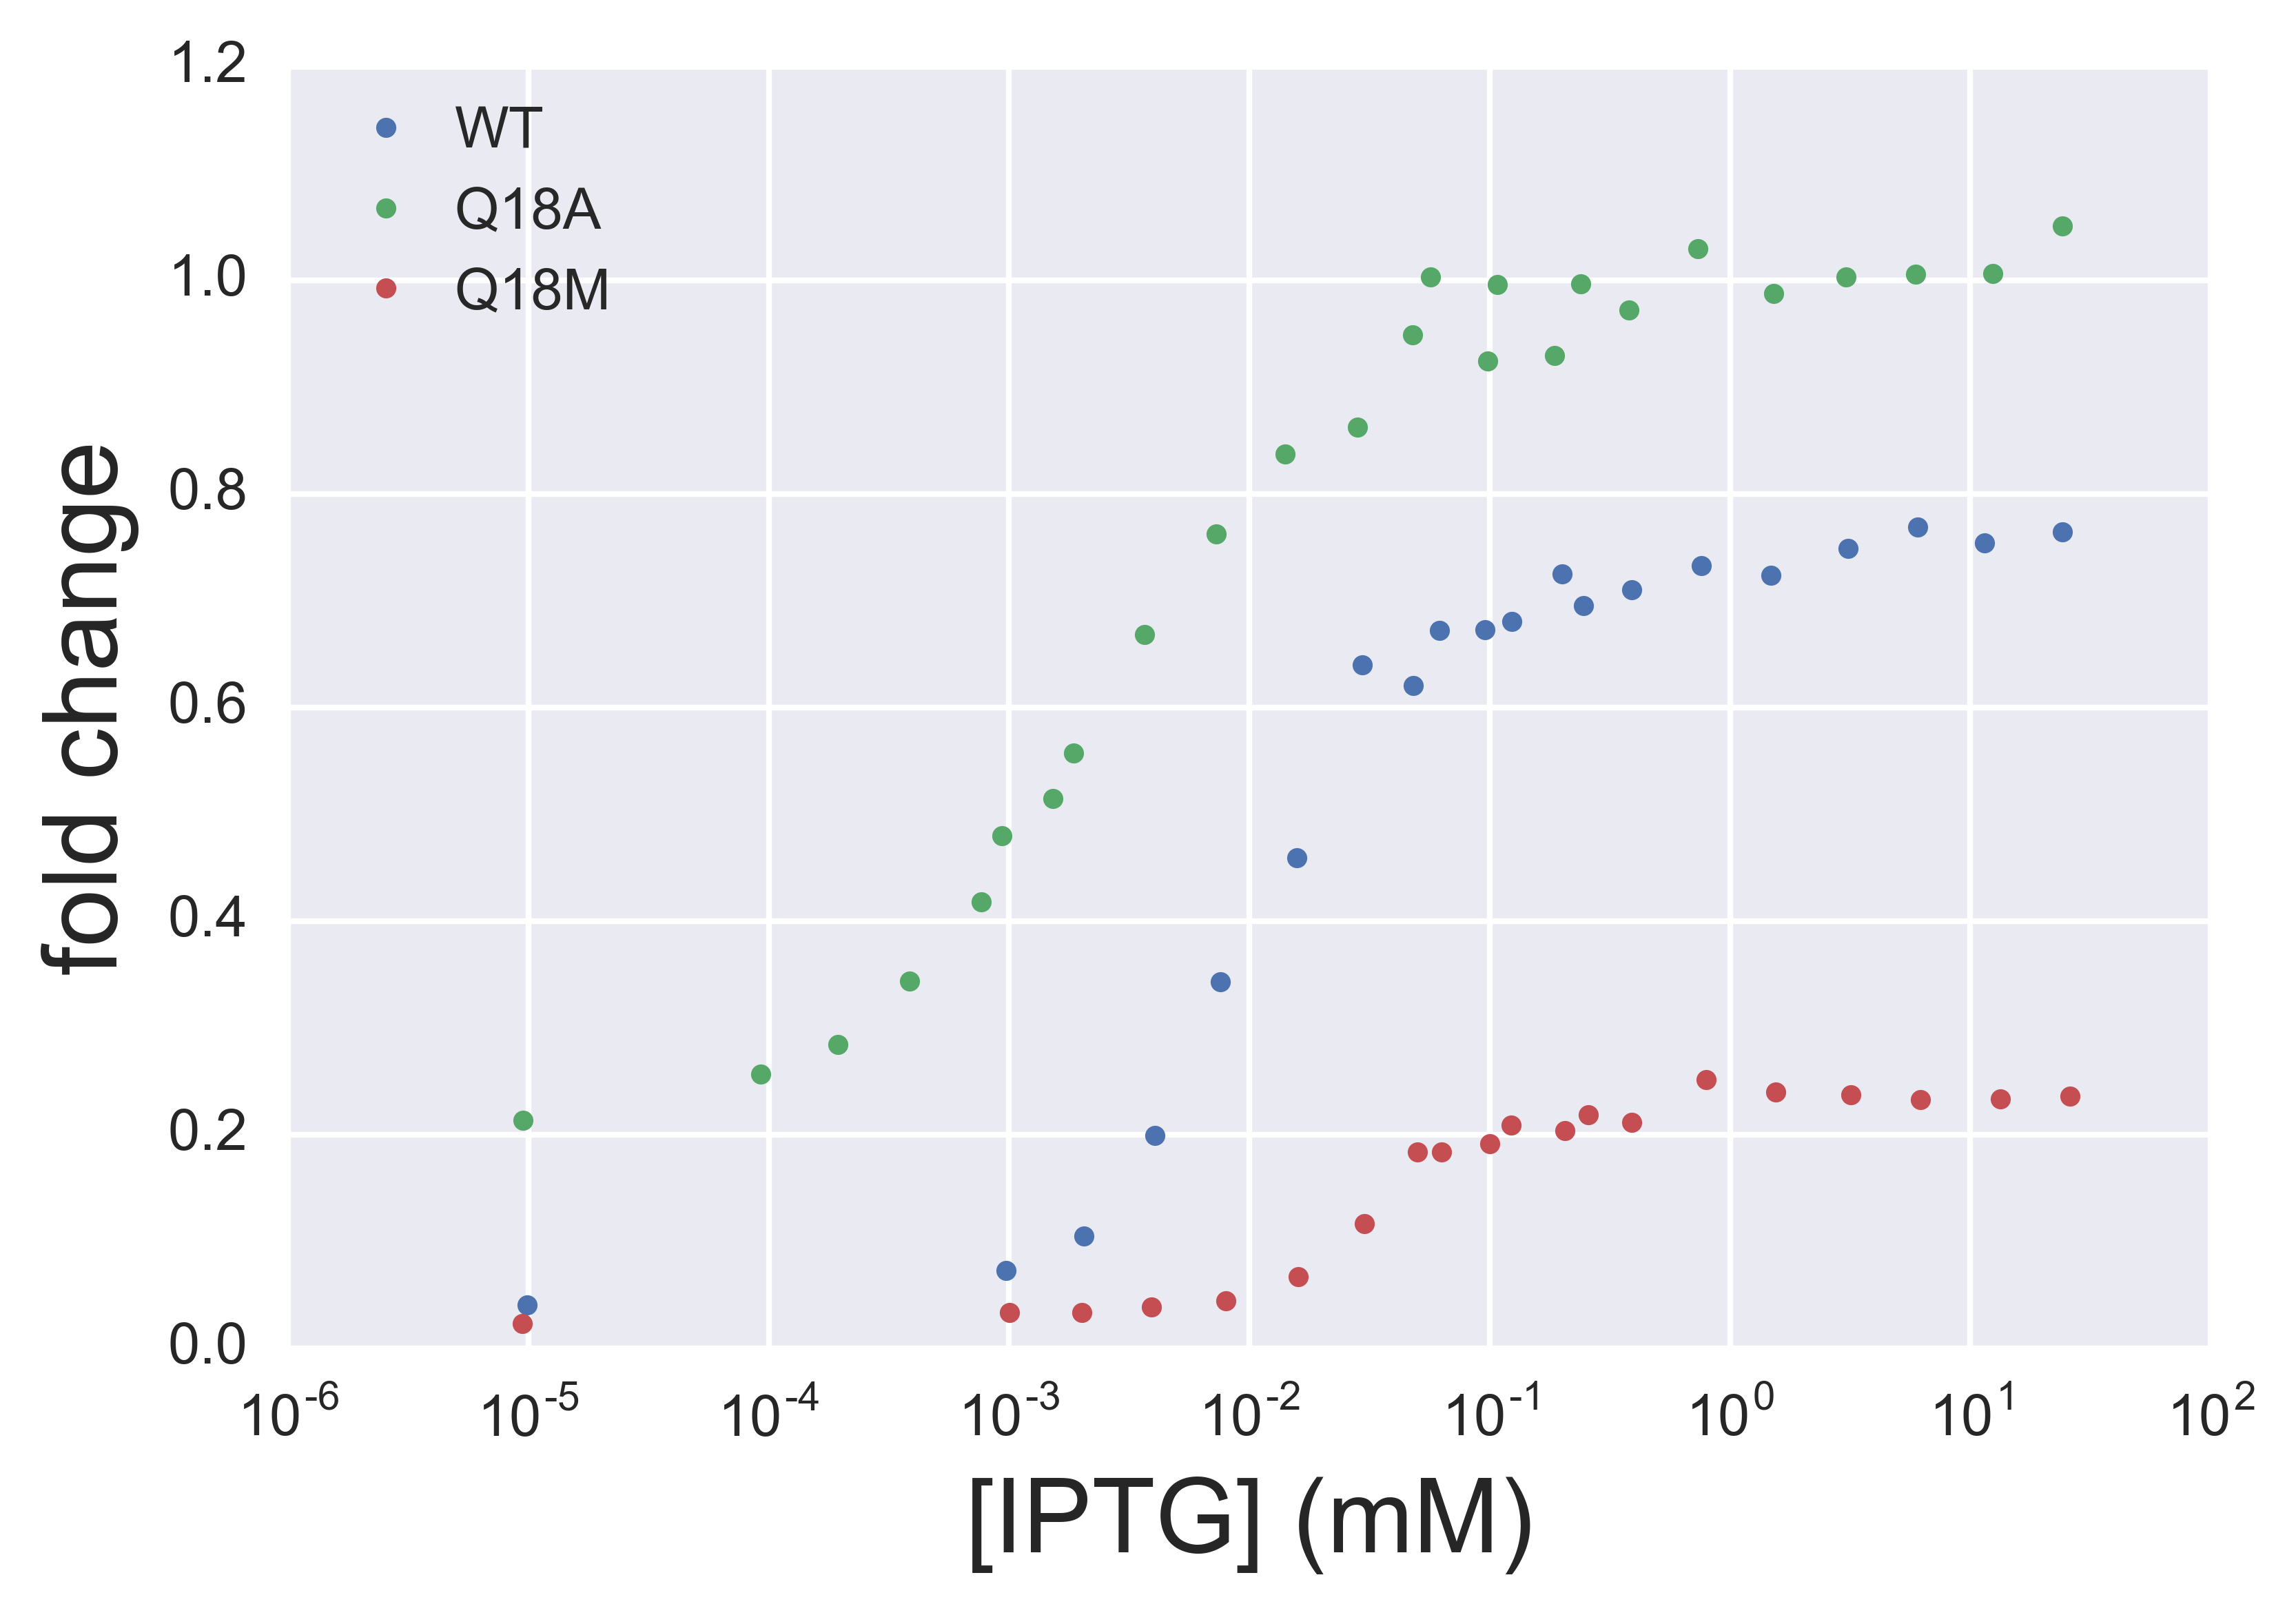

In [22]:
plt.semilogx(wt[:,0], wt[:,1], marker='.', linestyle='none')
plt.semilogx(q18a[:,0], q18a[:,1], marker='.', linestyle='none')
plt.semilogx(q18m[:,0], q18m[:,1], marker='.', linestyle='none')
plt.xlabel('[IPTG] (mM)')
plt.ylabel('fold change')
plt.legend(('WT', 'Q18A', 'Q18M'), loc='upper left')

**c)** We use the convenience of NumPy's broadcasting. We can almost just type it out as if we were computing it for a single value of $c$.

In [23]:
# Fold change function
def fold_change(c, RK, KdA=0.017, KdI=0.002, Kswitch=5.8):
    """Compute theoretical fold change for MWC model."""
    
    # Inverse fold change
    inv_fc = 1 + (1 + c/KdA)**2 * RK / ((1 + c/KdA)**2 + Kswitch*(1 + c/KdI)**2)
 
    return 1 / inv_fc

**d)** To make the curves have the same color as the data points, we need to keep track of the colors. We store the default colors from Seaborn's color scheme in an tuple and then access the colors as we need them.

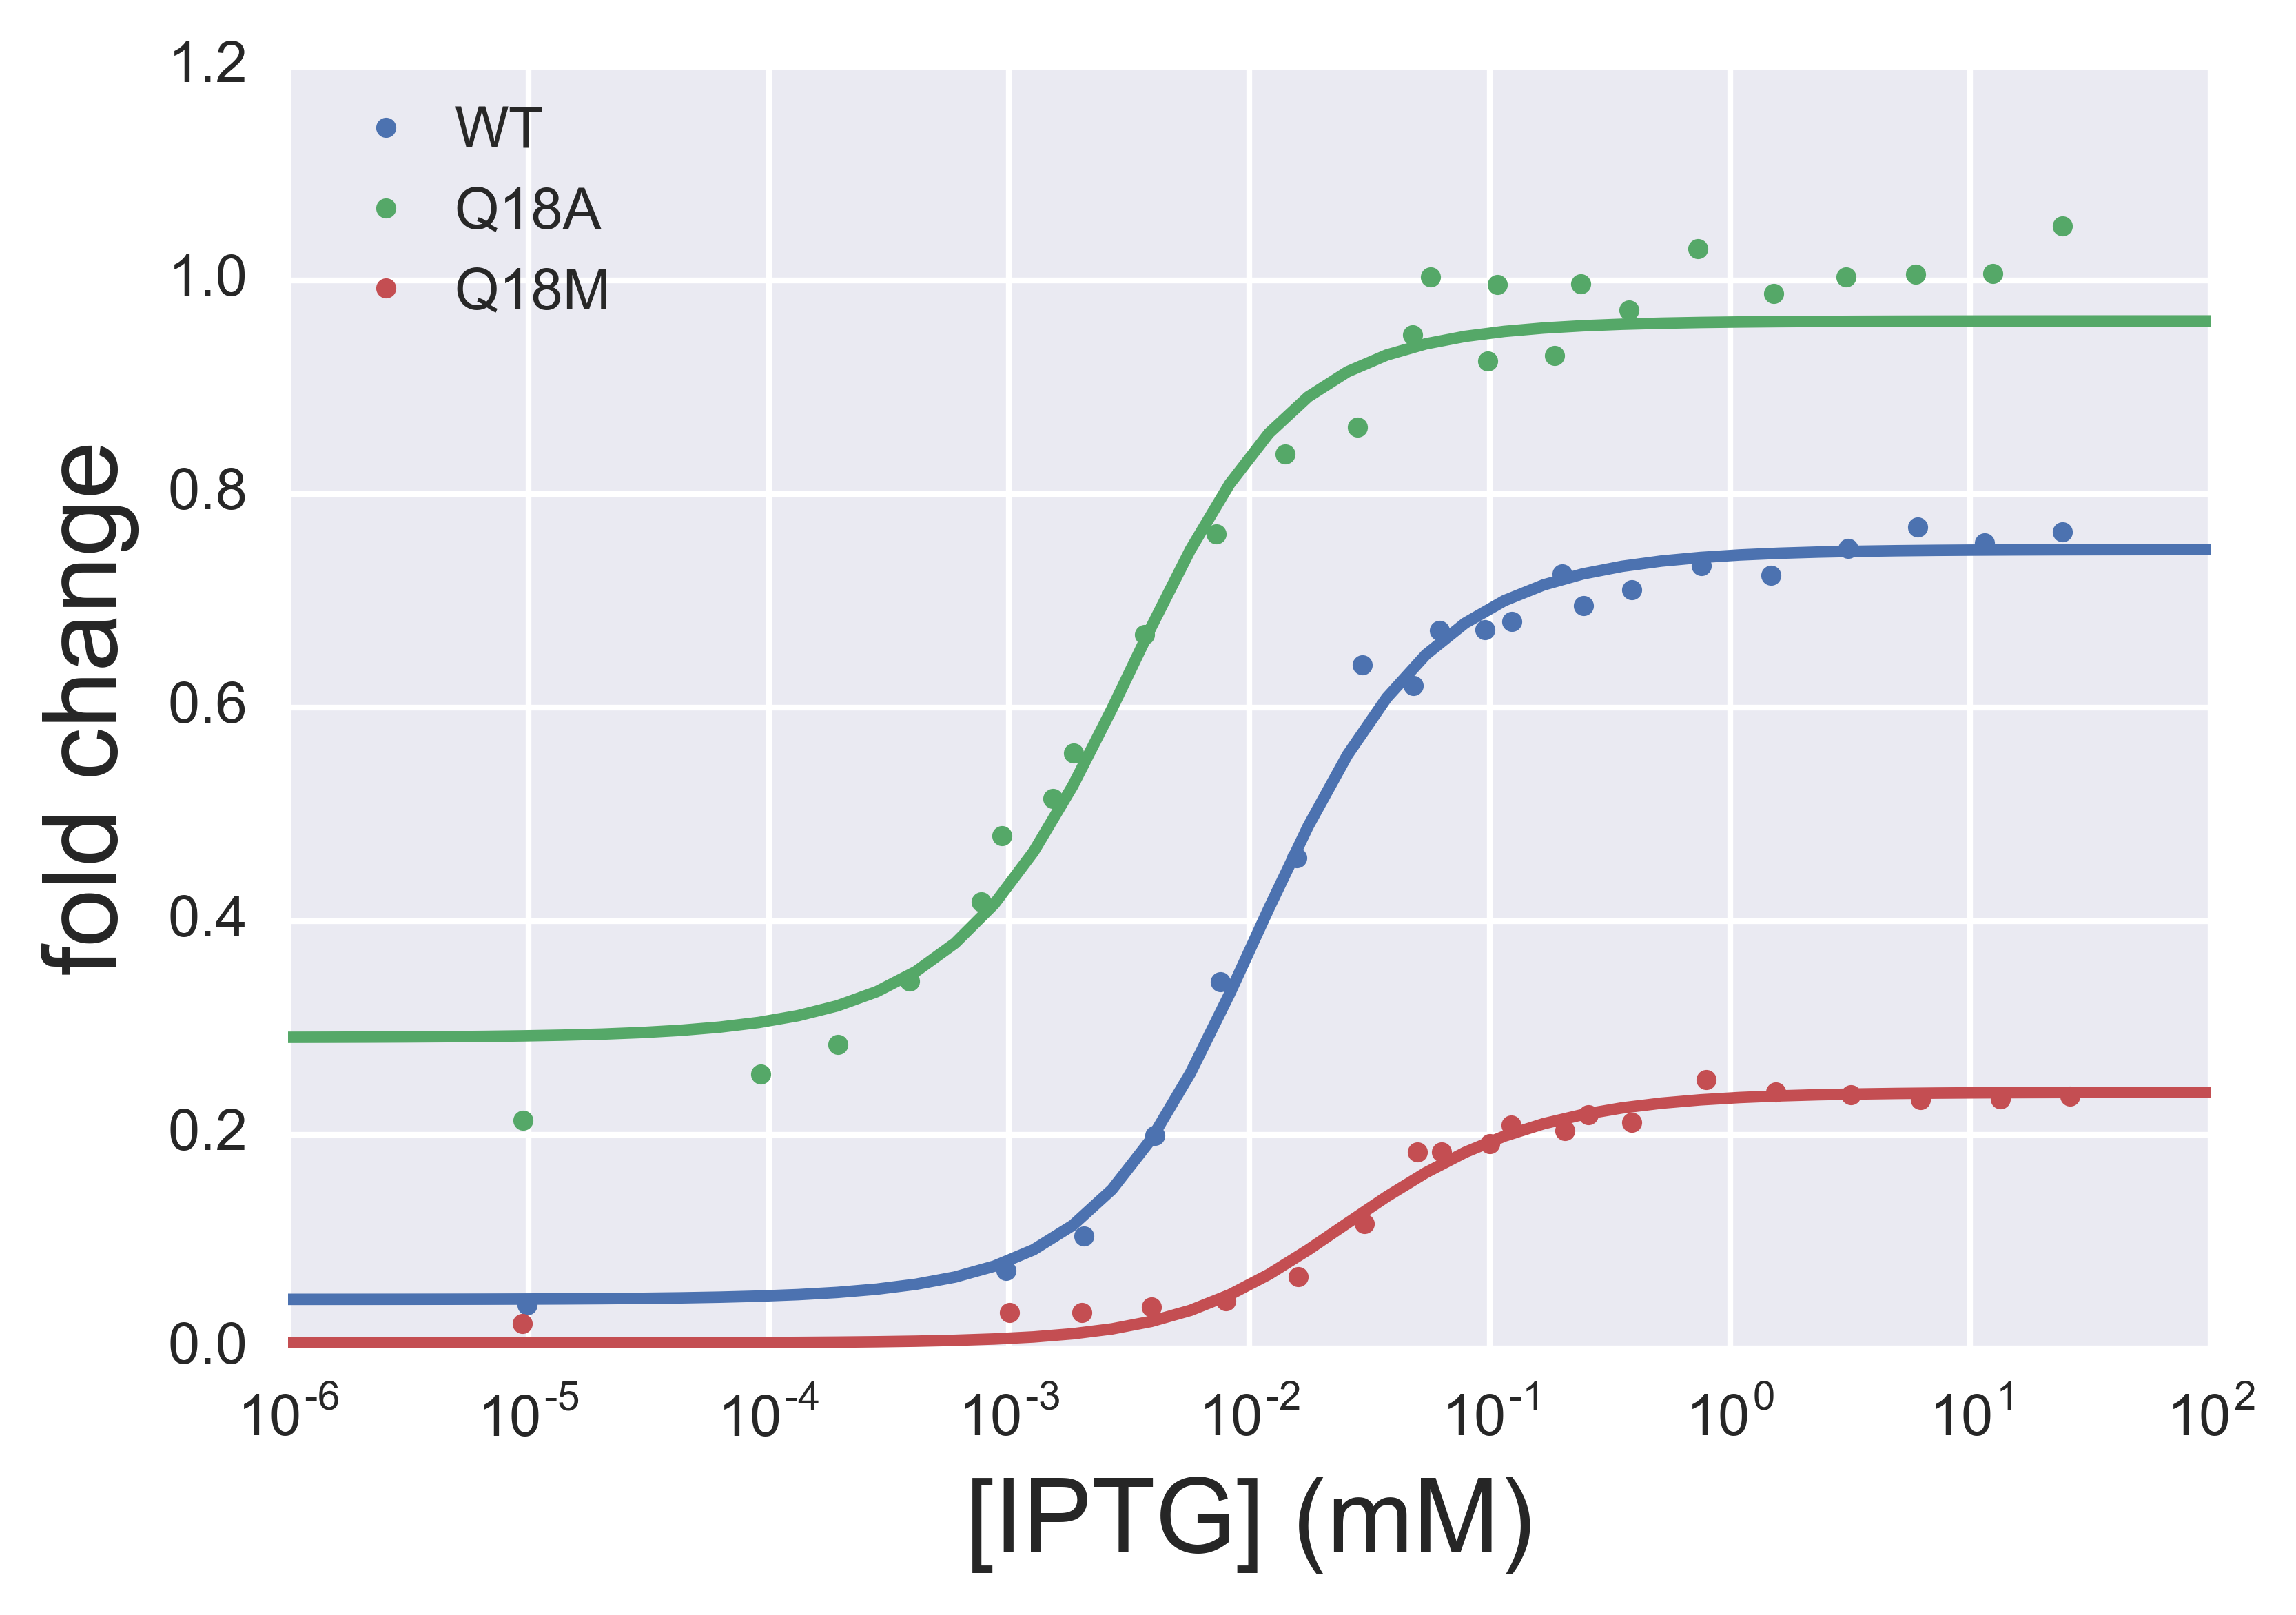

In [24]:
# Make plots of curves
colors = sns.color_palette()

# Theoretical concentration
c = np.logspace(-6, 2)

# Plot data points
plt.semilogx(wt[:,0], wt[:,1], marker='.', linestyle='none')
plt.semilogx(q18a[:,0], q18a[:,1], marker='.', linestyle='none')
plt.semilogx(q18m[:,0], q18m[:,1], marker='.', linestyle='none')

# Plot the smooth curves in same order
plt.semilogx(c, fold_change(c, 141.5), color=colors[0])
plt.semilogx(c, fold_change(c, 16.56), color=colors[1])
plt.semilogx(c, fold_change(c, 1332), color=colors[2])

# Label axes
plt.xlabel('[IPTG] (mM)')
plt.ylabel('fold change')
plt.legend(('WT', 'Q18A', 'Q18M'), loc='upper left')

**e and f)** First, we'll define our two functions.

In [25]:
def bohr_parameter(c, RK, KdA=0.017, KdI=0.002, Kswitch=5.8):
    """Compute Bohr parameter based on MWC model."""
    # Big nasty argument of logarithm
    log_arg = (1 + c/KdA)**2 / ((1 + c/KdA)**2 + Kswitch*(1 + c/KdI)**2)

    return -np.log(RK) - np.log(log_arg)

def fold_change_bohr(bohr_parameter):
    """Fold change as a function of the Bohr parameter."""
    return 1 / (1 + np.exp(-bohr_parameter))

Now, we'll calculate the curves and make our plots.

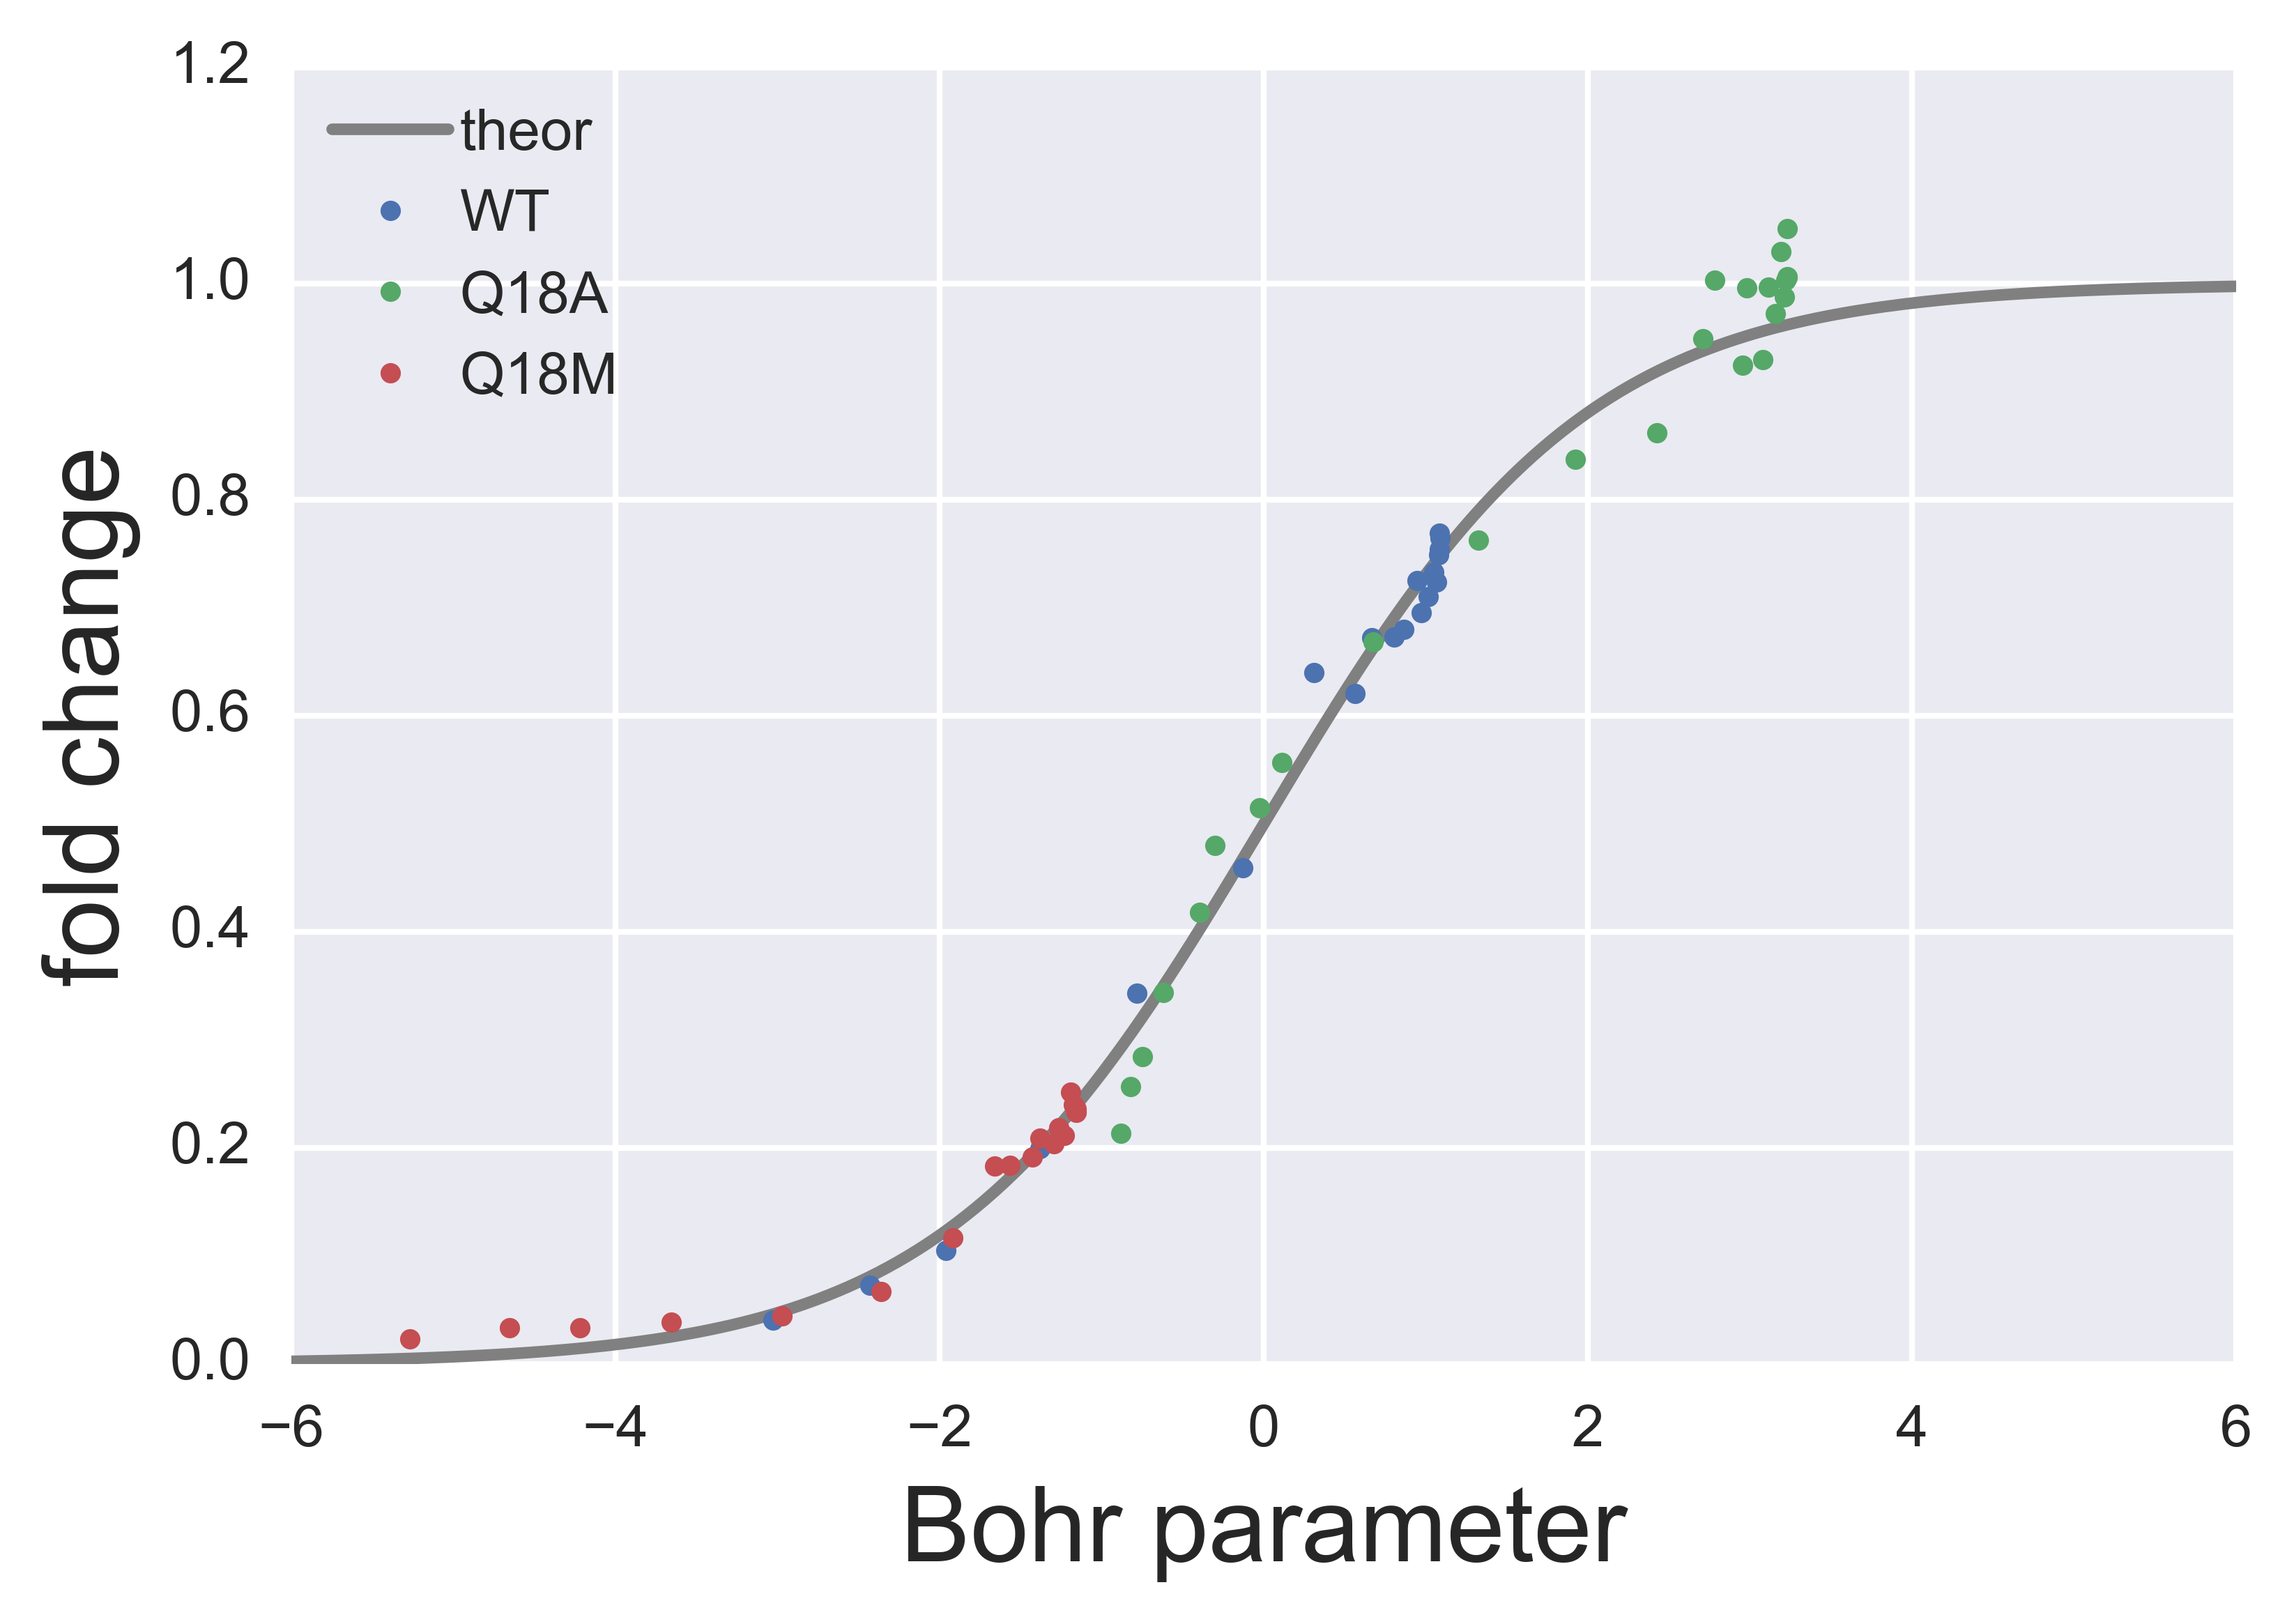

In [28]:
# Plot theoretical curve
bohr_theor = np.linspace(-6, 6, 200)
fc_theor = fold_change_bohr(bohr_theor)
plt.plot(bohr_theor, fc_theor, color='gray')

# Plot the data as a function of Bohr parameter.
bohr = bohr_parameter(wt[:,0], 141.5)
plt.plot(bohr, wt[:,1], marker='.', linestyle='none')

bohr = bohr_parameter(q18a[:,0], 16.56)
plt.plot(bohr, q18a[:,1], marker='.', linestyle='none')

bohr = bohr_parameter(q18m[:,0], 1332)
plt.plot(bohr, q18m[:,1], marker='.', linestyle='none')

# Label axes
plt.xlabel('Bohr parameter')
plt.ylabel('fold change')
plt.legend(('theor', 'WT', 'Q18A', 'Q18M'), loc='upper left')

We clearly see data collapse. When plotted this way, all data fall on the same curve. This suggests that indeed the only thing varying between the different mutants is the parameter $R/K$, the number of repressors divided by the repressor-operator dissociation constant.

## Exercise 3.3: Solving differential equations with NumPy

In addition to handling data, NumPy allows you do to *simulations*. We will do some of this in coming lessons when we deal with random number generators. For this exercise, we will use Euler's method to simulate a classic model for predator-prey population dynamics, the [Lotka-Volterra model](https://en.wikipedia.org/wiki/Lotka–Volterra_equations). As a warm-up example, we will simulate bacterial growth.

Bacterial growth can be modeled by the differential equation

\begin{align}
\frac{\mathrm{d}n}{\mathrm{d}t} = k n,
\end{align}

where $n$ is the number of bacteria and $k$ is the growth rate. The idea here is that the number of bacteria will grow faster the more bacteria we have, because there are more to divide. Analytically, we know the solution to this differential equation is

\begin{align}
n(t) = n_0 \mathrm{e}^{kt},
\end{align}

i.e., exponential growth. But suppose we did not know how to compute that. We could *simulate* the differential equation. We do this by discretizing time. Instead ot a derivative, we have a change in $n$ over a change in time $t$.

\begin{align}
\frac{\mathrm{d}n}{\mathrm{d}t} \approx \frac{\Delta n}{\delta t} = k n.
\end{align}

Let's say we know $n$ and time zero, $n(0)$. Then $n$ at time $t = \Delta t$ is

\begin{align}
n(\Delta t) \approx n(0) + \Delta n = n(0) + k n(0).
\end{align}

More generally, we can write

\begin{align}
\frac{\mathrm{d}n}{\mathrm{d}t} = f(n),
\end{align}

and

\begin{align}
n(t+\Delta t) \approx n(t) + \Delta t\,f(n).
\end{align}

So, we can instruct Python to take our current value of $n$, and then add $\Delta t$ times $f(n)$ to get our new $n$ at a time just a bit later on, at $t + \Delta t$. Let's code that up!

In [2]:
# Specify parameter
k = 1

# Specify my little time step
delta_t = 0.01

# Make an array of time points, evenly spaced up to 10
t = np.arange(0, 10, delta_t)

# Make an array to store the number of bacteria
n = np.empty_like(t)

# Set the initial number of bacteria
n[0] = 1

# Write a for loop to keep updating n as time goes on
for i in range(1, len(t)):
    n[i] = n[i-1] + delta_t * k * n[i-1]

Ok! We just computed the time points and the number of bacteria, so we can just plot the result!

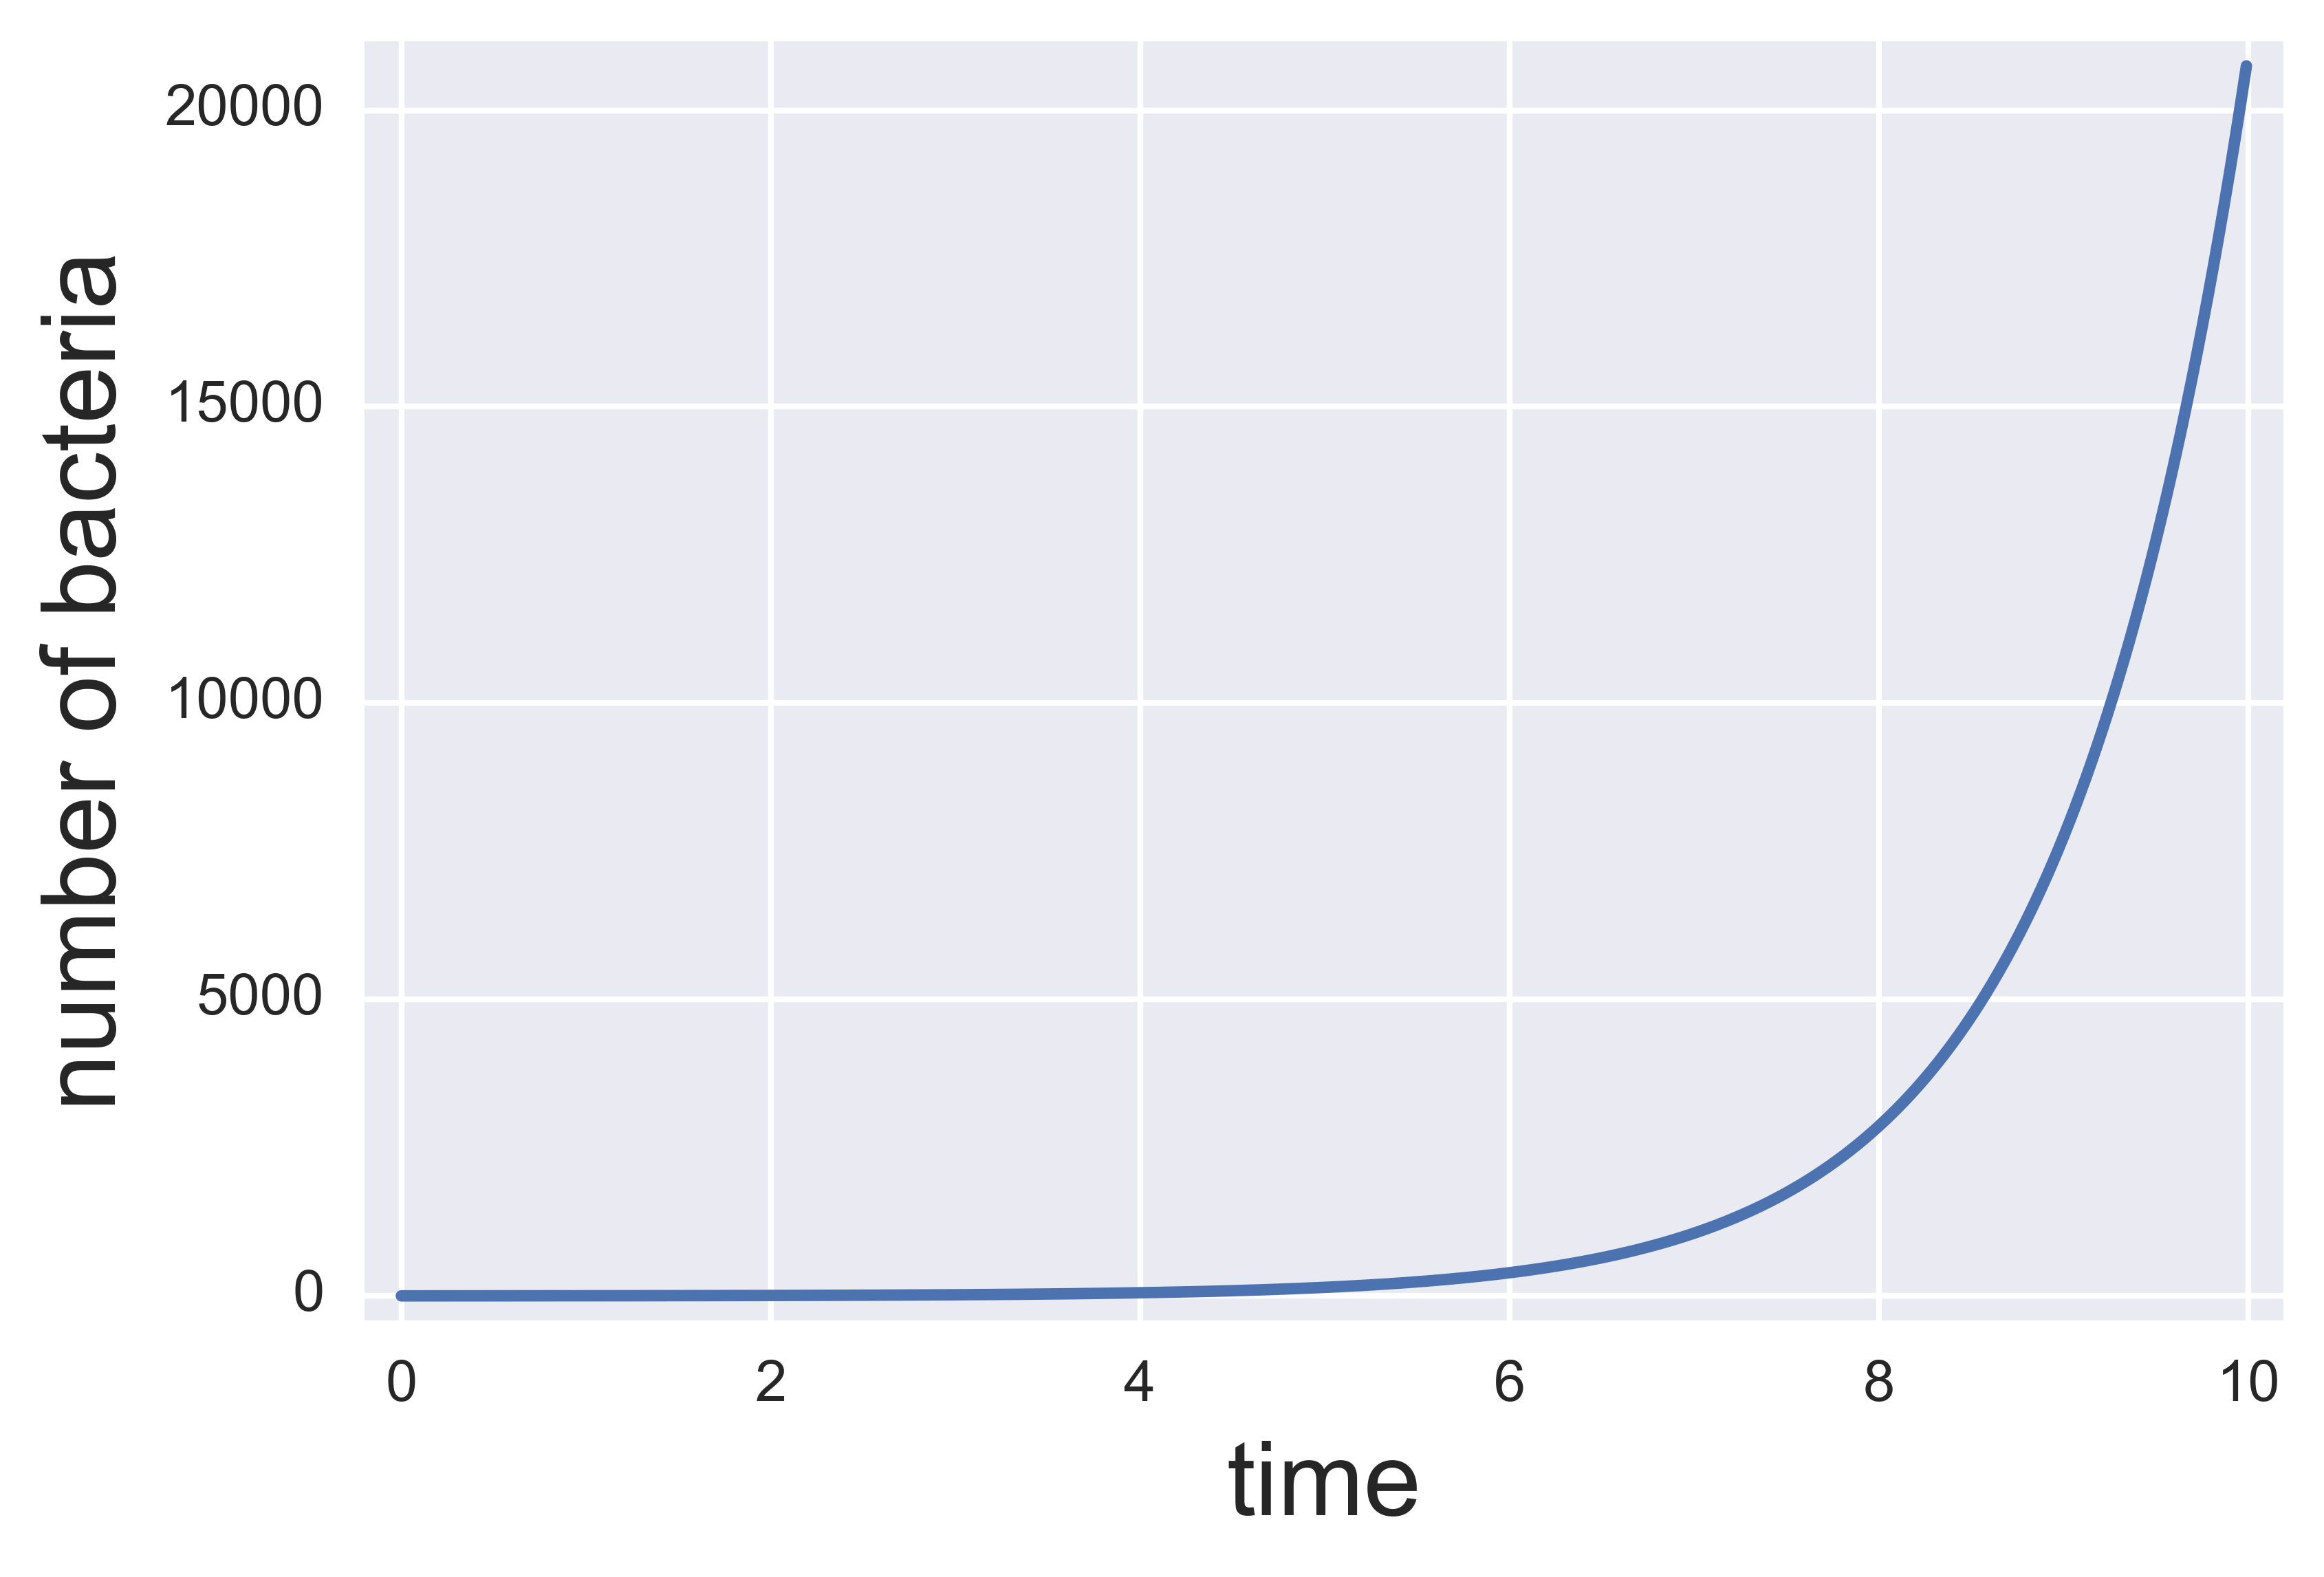

In [3]:
plt.plot(t, n)
plt.margins(0.02)
plt.xlabel('time')
plt.ylabel('number of bacteria')

And there is the famous exponential growth!

This time stepping method is called [Euler's method](https://en.wikipedia.org/wiki/Euler_method), and what we're doing is called *numerical solution of a differential equation*.

**a)** Now it's time to simulate the Lotka-Volterra model. Since predator and prey both begin with "p," we'll call the predators foxes ($f$) and the prey rabbits ($r$). The differential equation describing the dynamics of the rabbit population is

\begin{align}
\frac{\mathrm{d}r}{\mathrm{d}t} = \alpha r - \beta f r.
\end{align}

The first term at the right hand side is exponential growth, the same you would expect for a growing bacterial colony. The second term is killing off due to predation. If $f$ is large, more rabbits get hunted down.

The differential equation describing the dynamics of the fox population is

\begin{align}
\frac{\mathrm{d}f}{\mathrm{d}t} = \delta f r - \gamma f.
\end{align}

The first term represents growth in the fox population by consumption of rabbits. The second term is the natural die-off of foxes.

Your task in this exercise is to numerically solve these two differential equations together and then plot the result. Use the following parameter values

    alpha = 1
    beta = 0.2
    delta = 0.3
    gamma = 0.8
    delta_t = 0.01
    t = np.arange(0, 60, delta_t)
    r[0] = 10
    f[0] = 1

Even though there are now two differential equations, the procedure is the same, you update each by adding $\Delta t$ times the respective derivative.

When you plot the result, does it make sense?

**b)** [Bonus]  It is probably the simplest way to solve differential equations, and is by no means the best. SciPy has an ODE solver, `scipy.integrate.odeint()` that uses the more sophisticated and robust methods for solving systems of ODEs. Read the documentation about how `scipy.integrate.odeint()` works and use it to solve the Lotka-Volterra system of ODEs.

This problem is tough; I'm not giving you directions, and you are kind of on your own to read the documentation and figure it out. It may be useful to read [this tutorial](http://be150.caltech.edu/2016/handouts/intro_to_python_for_systems_biology.html) I wrote to help students solve ODEs that come up in systems biology.

### Exercise 3.3: solution

**a)** We take the same approach as in the exponential growth example. We just have to update  *two* variables at each time step, the rabbit and fox populations.

In [83]:
# Specify parameters
alpha = 1
beta = 0.2
delta = 0.3
gamma = 0.8
delta_t = 0.001
t = np.arange(0, 60, delta_t)

# Make arrays to store rabbit and fox populations
r = np.empty_like(t)
f = np.empty_like(t)

# Set initial conditions
r[0] = 10
f[0] = 1

# Write a for loop to keep updating r and f as time goes on
for i in range(1, len(t)):
    r[i] = r[i-1] + delta_t * (alpha * r[i-1] - beta * f[i-1] * r[i-1])
    f[i] = f[i-1] + delta_t * (delta * f[i-1] * r[i-1] - gamma * f[i-1])

Ok, let's see what we got!

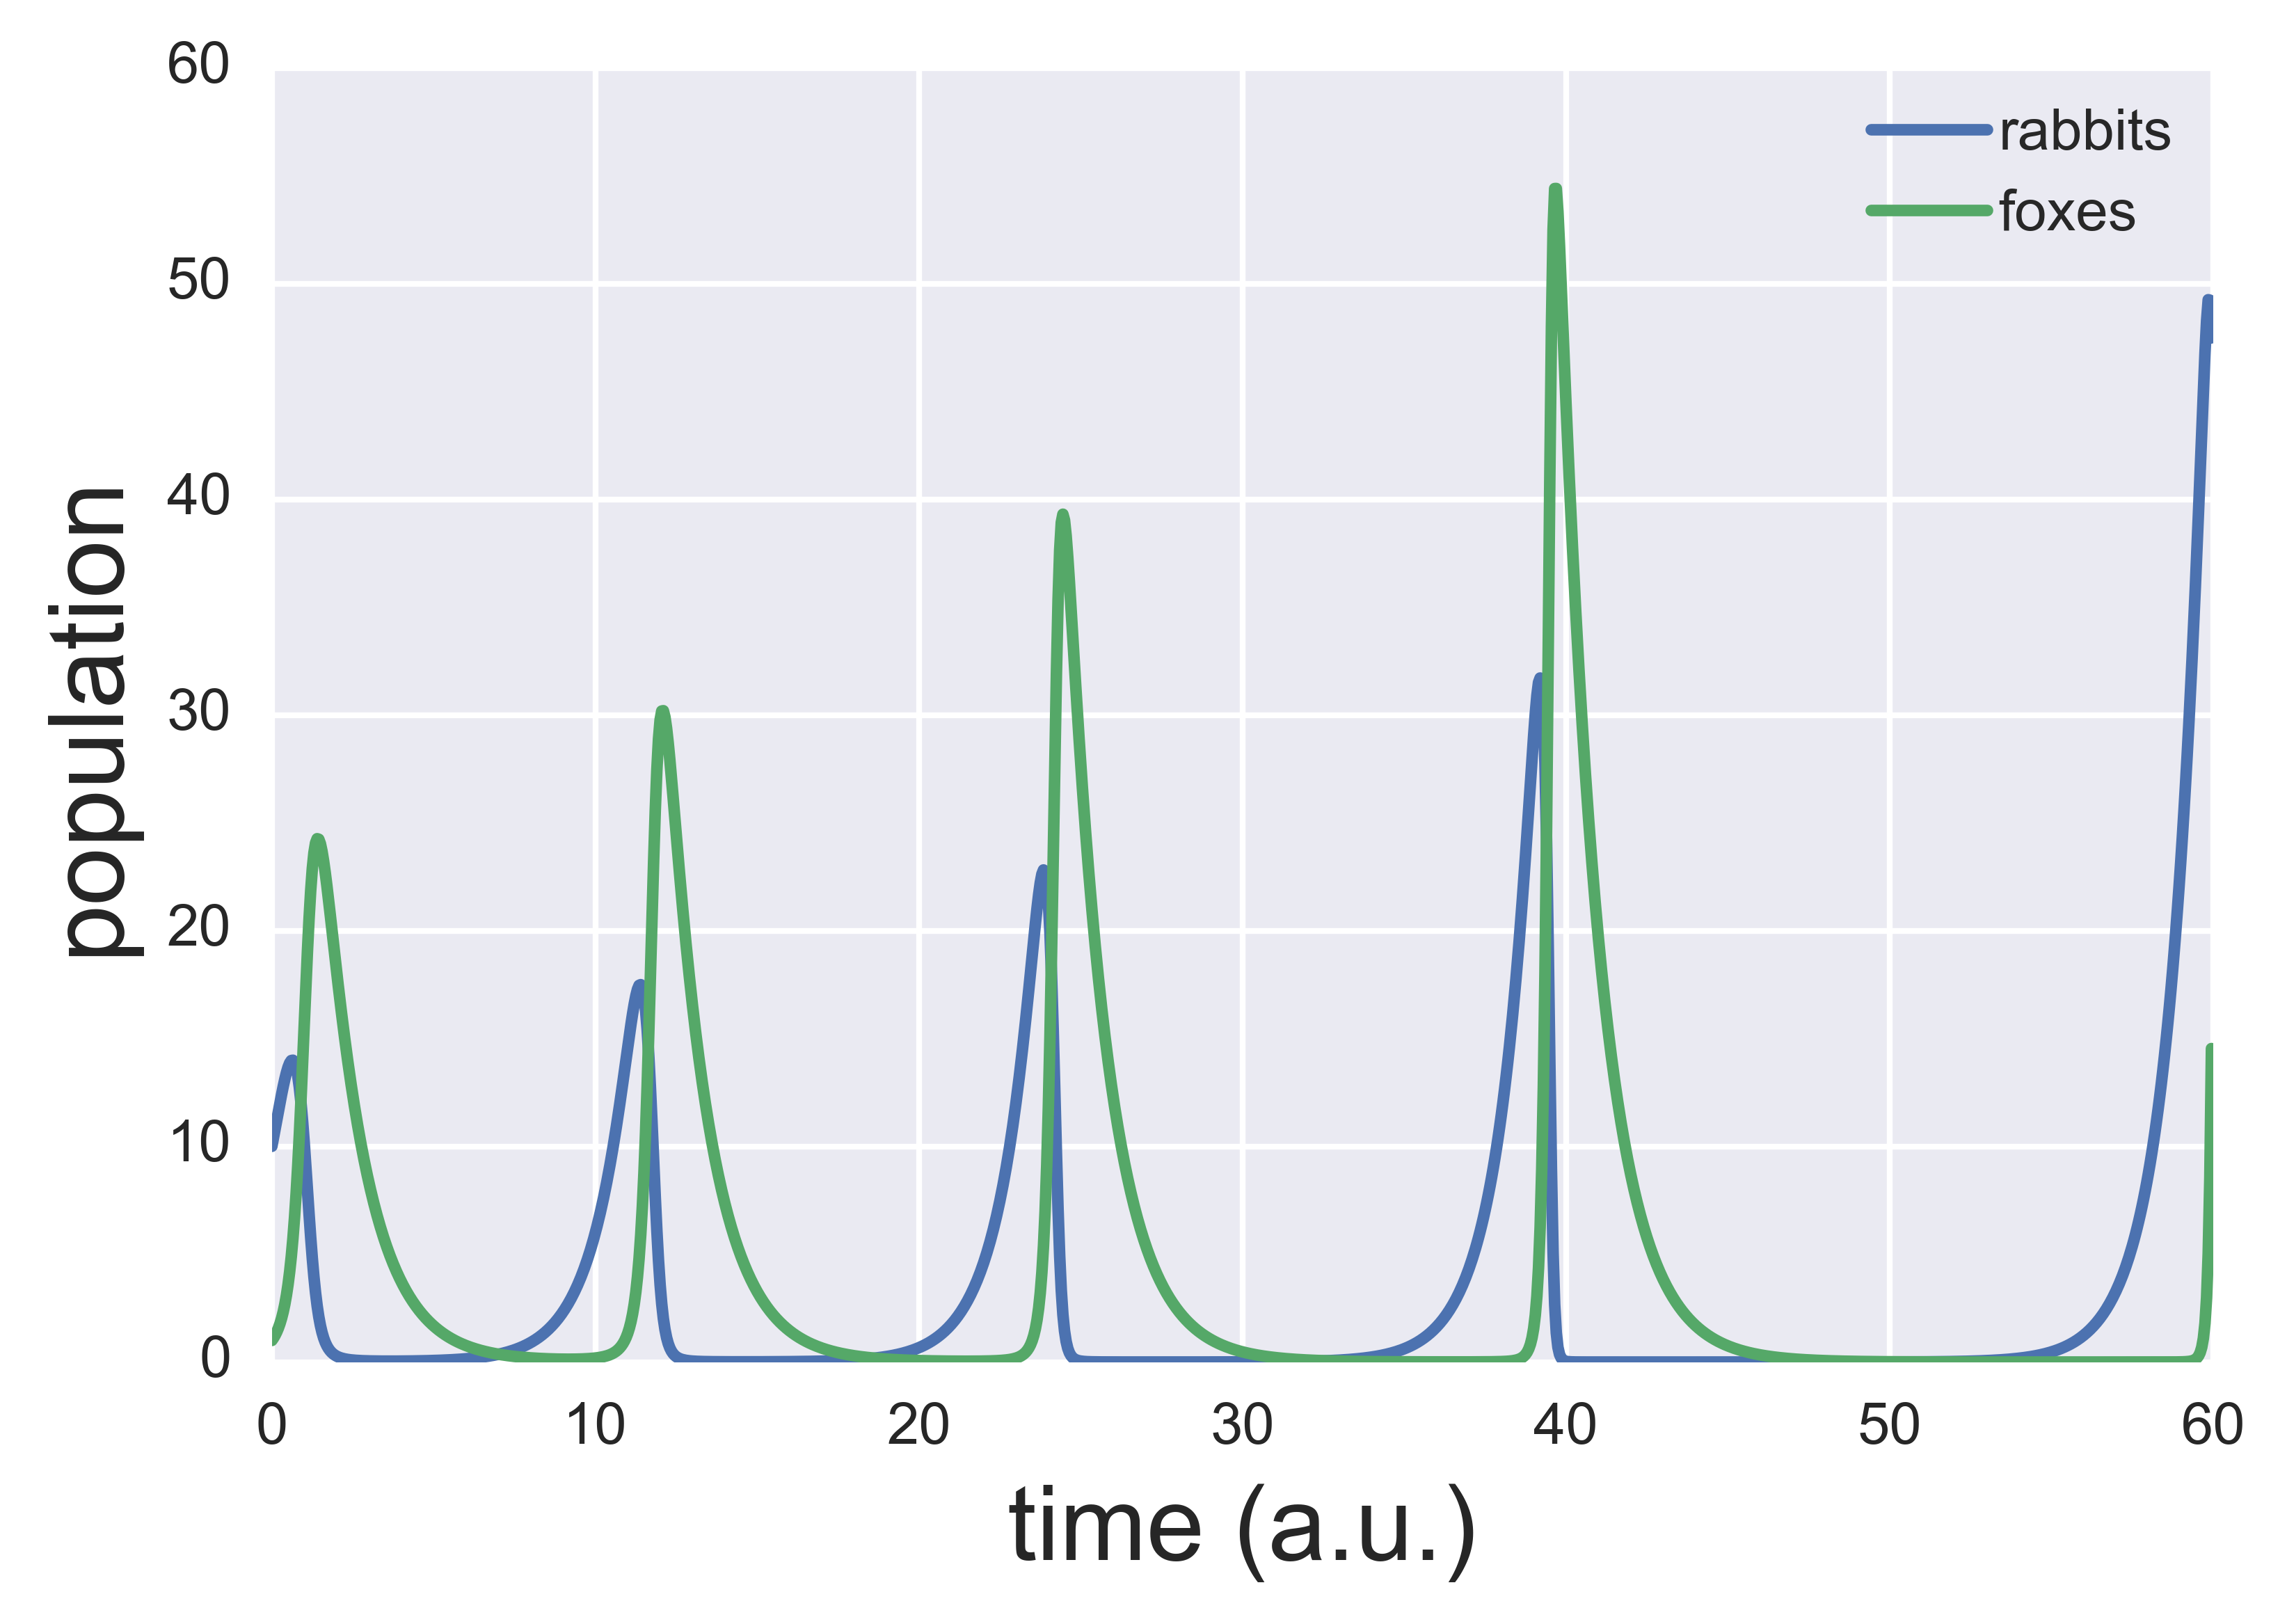

In [82]:
plt.plot(t, r)
plt.plot(t, f)
plt.xlabel('time (a.u.)')
plt.ylabel('population')
plt.legend(('rabbits', 'foxes'))

We get interesting behavior. When the rabbit population dies out, the foxes start to starve and their population comes down. As the fox population comes down, the rabbit population recovers because they do not have predators. When there are lots of rabbits, the foxes start eating again and their population grows. And on and on it goes!

**b)** Now, let's use `scipy.integrate.odeint()` to do the solution. We need to specify a function to compute the derivatives.

In [33]:
def dy_dt(y, t, alpha, beta, gamma, delta):
    """Right hand side of Lotka-Volterra equation; y = (rabbits, foxes)"""
    # Unpack y
    r, f = y
    
    # Compute derivatives
    dr_dt = alpha * r - beta * f * r
    df_dt = delta * r * f - gamma * f
    
    return np.array([dr_dt, df_dt])

Now we have to specify the initial conditions.

In [34]:
y0 = np.array([10, 1])

And specify the time points we want.

In [41]:
t = np.linspace(0, 60, 400)

And then we just stuff the system into `scipy.integrate.odeint()`. We have to be sure to pass the additional arguments that `dy_dt()` takes as a tuple.

In [42]:
y = scipy.integrate.odeint(dy_dt, y0, t, args=(alpha, beta, gamma, delta))

Now we can parse the results and make plots.

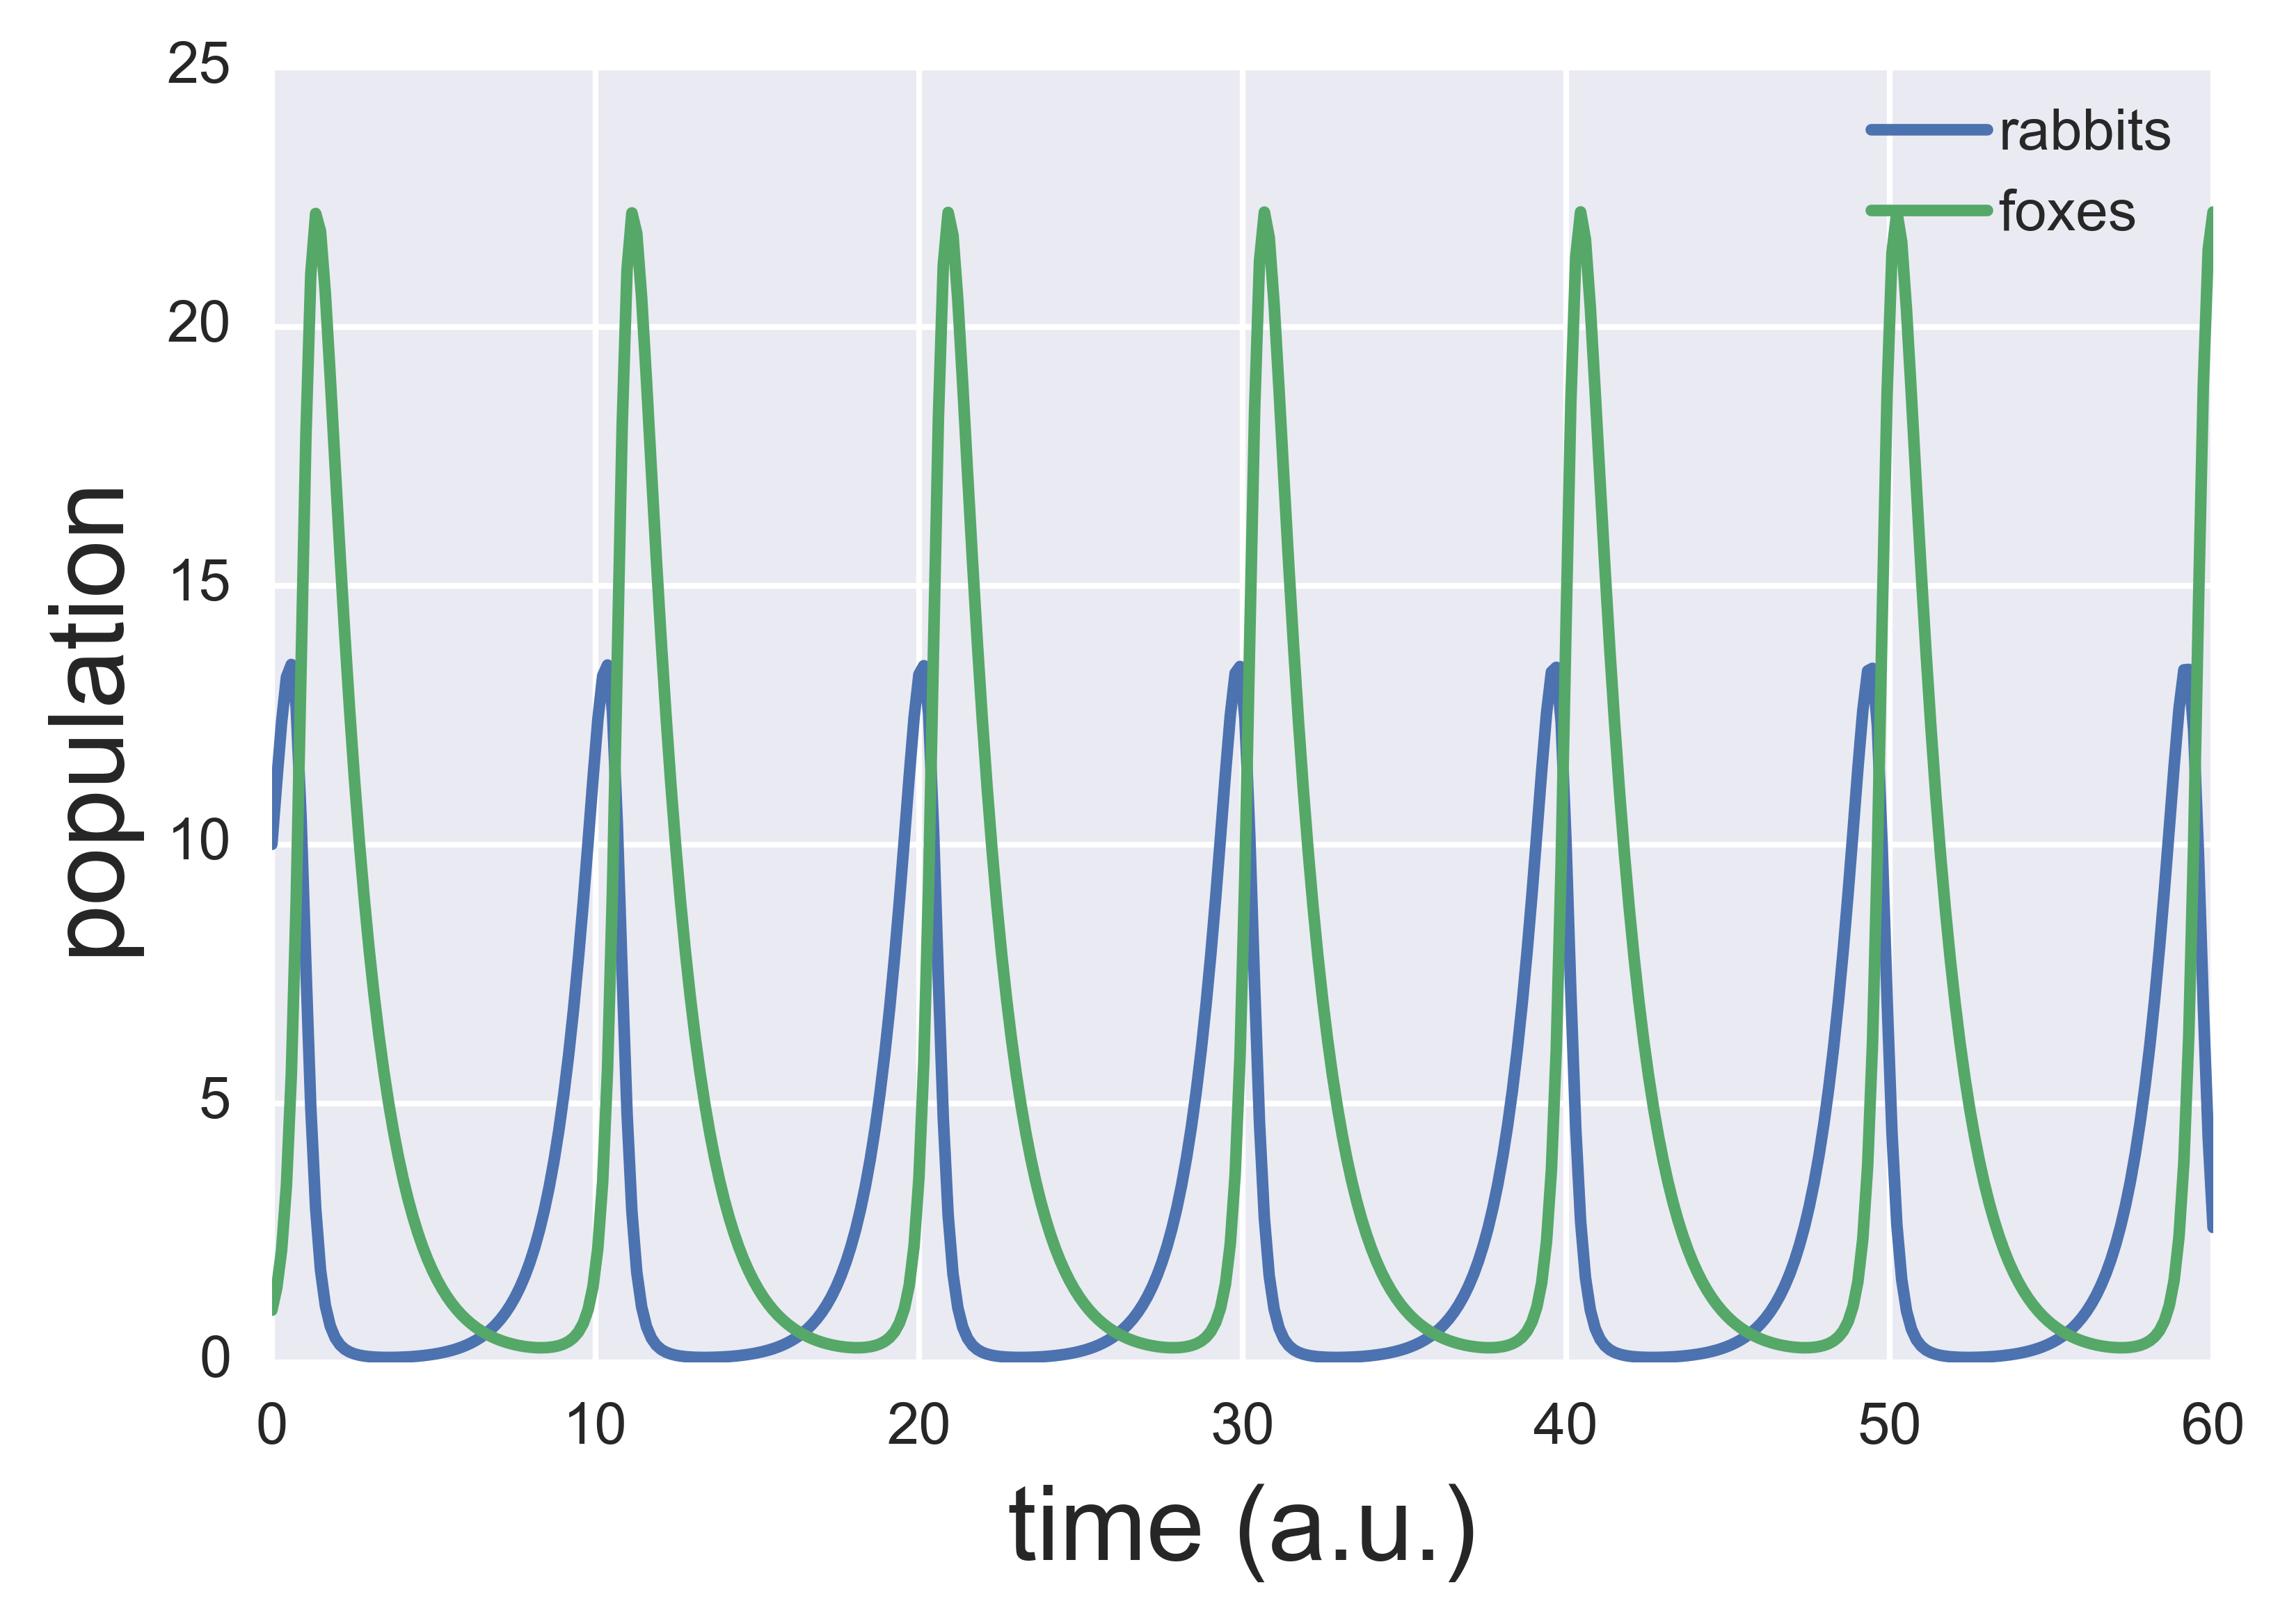

In [43]:
# Take out rabbits and foxes
r = y[:,0]
f = y[:,1]

plt.plot(t, r)
plt.plot(t, f)
plt.xlabel('time (a.u.)')
plt.ylabel('population')
plt.legend(('rabbits', 'foxes'))

We get the same result as with Euler's method. While we haven't experienced it here, Euler's method has serious problems with stability (try re-running it with `delta_t = 0.05` and then again with `delta_t = 0.1` and see what happens). In general, it is much better to use the highly optimized and more stable algorithms of `scipy.integrate.odeint()`.